# Week 6-6 영어 리뷰 데이터 전처리  Lab

1. 삼성 smartthings에 대한 영문 리뷰 파일을 열어서 review_df에 저장하시오.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\Administrator\Downloads\6주차_11일차,12일차_자연어처리\Week6 자연어처리 Data')
review_df=pd.read_csv("smartthings_e_review.csv")
review_df

,date,star,like,comment
0,"September 19, 2021",1,15.0,Really unbelievable you can't even turn on a S...
1,"September 17, 2021",1,12.0,This app is so bad. It continually and randoml...
2,"September 17, 2021",2,11.0,I have this app on Android and iOS. It will no...
3,"September 15, 2021",2,15.0,Watch app does not sync current state status f...
4,"September 11, 2021",1,8.0,"Unable to add my hue lights, every function co..."
...,...,...,...,...
10955,"November 16, 2019",1,NaN,Wont connect to my Samsung tv. Using samsung p...
10956,"December 12, 2020",3,NaN,This is good but have one issue with 4D-pad wh...
10957,"December 14, 2019",1,NaN,"App crashes and stops. Removed, reinstall, try..."
10958,"January 17, 2019",1,NaN,since this smart things came in they took the ...


2. 대소문자를 모두 소문자로 변환하시오.

In [3]:
review_df['comment_n']=review_df['comment'].apply(lambda x: x.lower())
review_df['comment_n']

0        really unbelievable you can't even turn on a s...
1        this app is so bad. it continually and randoml...
2        i have this app on android and ios. it will no...
3        watch app does not sync current state status f...
4        unable to add my hue lights, every function co...
                               ...                        
10955    wont connect to my samsung tv. using samsung p...
10956    this is good but have one issue with 4d-pad wh...
10957    app crashes and stops. removed, reinstall, try...
10958    since this smart things came in they took the ...
10959    it is good, you can do a lot, wish if they can...
Name: comment_n, Length: 10960, dtype: object

3. 숫자, 문장부호, 특수문자를 제거하시오.

In [4]:
import re
p=re.compile("[0-9]+")
review_df['comment_n']=review_df['comment_n'].apply(lambda x: p.sub(" ", x))
review_df['comment_n']

0        really unbelievable you can't even turn on a s...
1        this app is so bad. it continually and randoml...
2        i have this app on android and ios. it will no...
3        watch app does not sync current state status f...
4        unable to add my hue lights, every function co...
                               ...                        
10955    wont connect to my samsung tv. using samsung p...
10956    this is good but have one issue with  d-pad wh...
10957    app crashes and stops. removed, reinstall, try...
10958    since this smart things came in they took the ...
10959    it is good, you can do a lot, wish if they can...
Name: comment_n, Length: 10960, dtype: object

4. 단어 토콘화를 하고 불용어를 제거하시오.

In [5]:
p=re.compile("\W+")
review_df['comment_n']=review_df['comment_n'].apply(lambda x: p.sub(" ", x))
review_df['comment_n']

0        really unbelievable you can t even turn on a s...
1        this app is so bad it continually and randomly...
2        i have this app on android and ios it will not...
3        watch app does not sync current state status f...
4        unable to add my hue lights every function com...
                               ...                        
10955    wont connect to my samsung tv using samsung ph...
10956    this is good but have one issue with d pad whe...
10957    app crashes and stops removed reinstall try to...
10958    since this smart things came in they took the ...
10959    it is good you can do a lot wish if they can a...
Name: comment_n, Length: 10960, dtype: object

5. 어간 추출을 하시오.

In [6]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords  

stop_words = set(stopwords.words('english')) 

review_df['comment_n']=review_df['comment_n'].apply(lambda x: word_tokenize(x))
review_df['comment_n']

0        [really, unbelievable, you, can, t, even, turn...
1        [this, app, is, so, bad, it, continually, and,...
2        [i, have, this, app, on, android, and, ios, it...
3        [watch, app, does, not, sync, current, state, ...
4        [unable, to, add, my, hue, lights, every, func...
                               ...                        
10955    [wont, connect, to, my, samsung, tv, using, sa...
10956    [this, is, good, but, have, one, issue, with, ...
10957    [app, crashes, and, stops, removed, reinstall,...
10958    [since, this, smart, things, came, in, they, t...
10959    [it, is, good, you, can, do, a, lot, wish, if,...
Name: comment_n, Length: 10960, dtype: object

In [31]:
def remove_stopwords(word_tokens):
    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    return result

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_stopwords(x))
review_df['comment_n']

0        [really, unbelievable, even, turn, samsung, te...
1        [app, bad, continually, randomly, transfer, au...
2        [app, android, io, allow, add, photo, gallery,...
3        [watch, app, sync, current, state, status, fav...
4        [unable, add, hue, light, every, function, com...
                               ...                        
10955    [wont, connect, samsung, tv, using, samsung, p...
10956    [good, one, issue, pad, app, go, inactive, pad...
10957    [app, crash, stop, removed, reinstall, try, si...
10958    [since, smart, thing, came, took, quick, conne...
10959    [good, lot, wish, add, flexibility, automation...
Name: comment_n, Length: 10960, dtype: object

In [32]:
from nltk.stem import WordNetLemmatizer

n=WordNetLemmatizer()

review_df['comment_n']=review_df['comment_n'].apply(lambda x: [n.lemmatize(w) for w in x])

review_df.to_csv('smartthings_e_review_result.csv',index=False)
review_df['comment_n']

0        [really, unbelievable, even, turn, samsung, te...
1        [app, bad, continually, randomly, transfer, au...
2        [app, android, io, allow, add, photo, gallery,...
3        [watch, app, sync, current, state, status, fav...
4        [unable, add, hue, light, every, function, com...
                               ...                        
10955    [wont, connect, samsung, tv, using, samsung, p...
10956    [good, one, issue, pad, app, go, inactive, pad...
10957    [app, crash, stop, removed, reinstall, try, si...
10958    [since, smart, thing, came, took, quick, conne...
10959    [good, lot, wish, add, flexibility, automation...
Name: comment_n, Length: 10960, dtype: object

6. Top-15 단어 빈도 그래프를 그리시오.

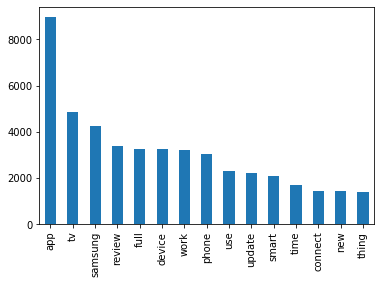

In [35]:
total_word=[]
for i in range(len(review_df)):
    total_word.extend(review_df.loc[i,'comment_n'])

pd.Series(total_word).value_counts().head(15)

pd.Series(total_word).value_counts().head(15).plot(kind='bar')

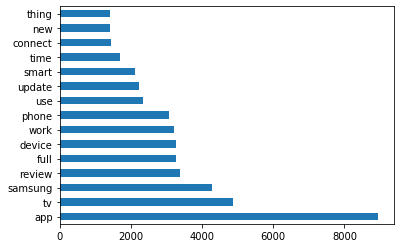

In [25]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh')

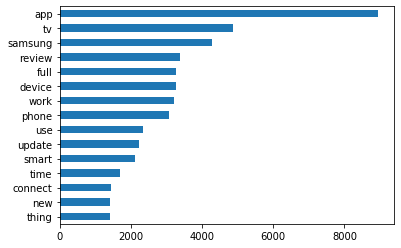

In [26]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh').invert_yaxis()

In [27]:
a=list(range(0,100))

In [30]:
[3*x for x in a if x%10==0]

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]